# c. Shallow Neural Network (SNN) 
- Train on Duke (400 cases)
- Validation on Duke (100 cases)
- Test on UAB (301 cases)

# Key step: Make numpy array
- make visual filed data into numpy.array

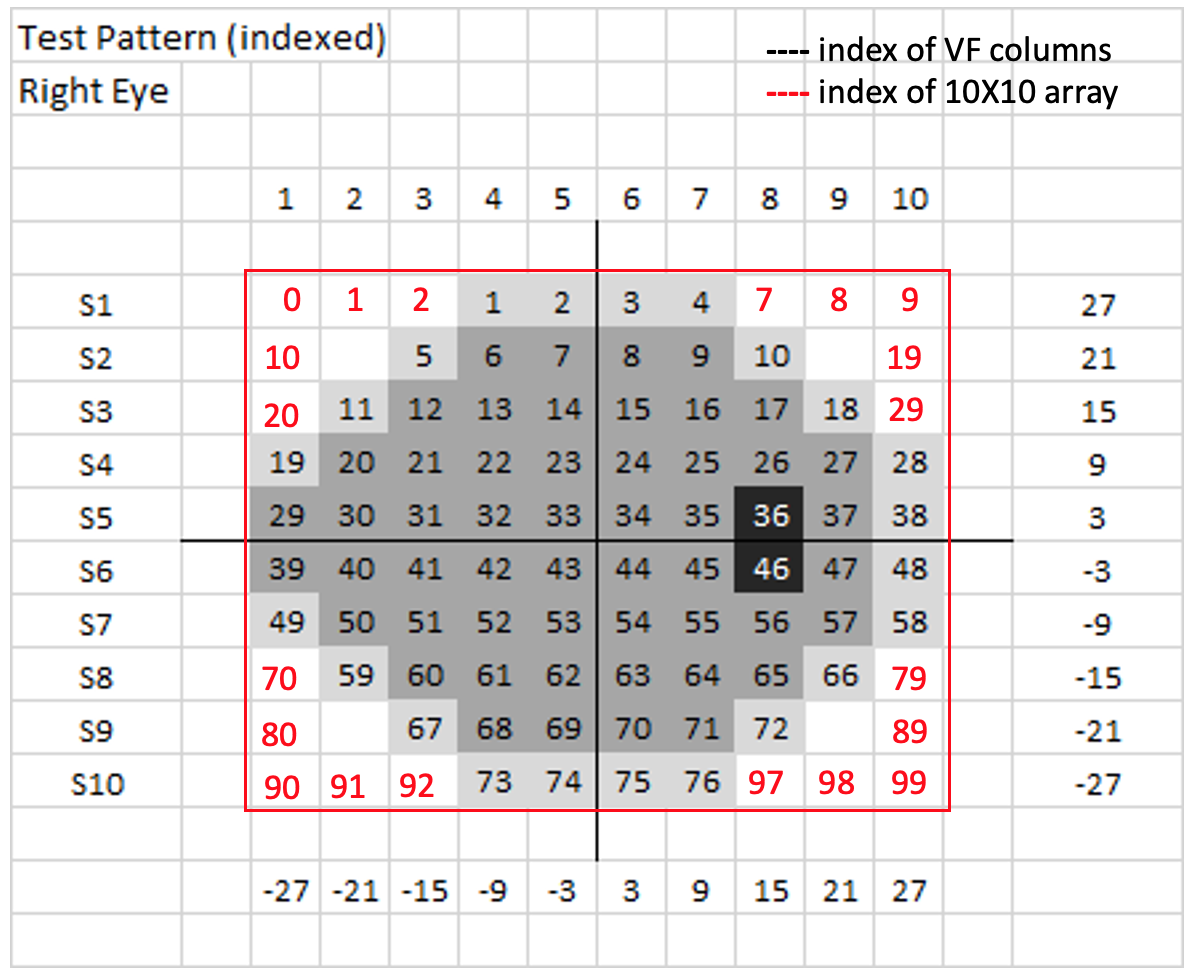

# 1. Make Visual Field Data into Numpy Array

In [1]:
import pandas as pd
import numpy as np

meta = pd.read_csv("0. meta.csv")
thr = pd.read_csv("1. thr.csv")
td = pd.read_csv("2. td.csv")
tdp = pd.read_csv("3. tdp.csv")

print("The shape of thr is", thr.shape)
thr.head()

The shape of thr is (500, 76)


,n9_s27_thr,n3_s27_thr,t3_s27_thr,t9_s27_thr,n15_s21_thr,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,t15_s21_thr,...,n15_i21_thr,n9_i21_thr,n3_i21_thr,t3_i21_thr,t9_i21_thr,t15_i21_thr,n9_i27_thr,n3_i27_thr,t3_i27_thr,t9_i27_thr
0,NaN,NaN,NaN,NaN,NaN,28,28,26,29,NaN,...,NaN,11,24,27,29,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,24,26,28,24,NaN,...,NaN,26,26,25,28,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,29,27,24,26,NaN,...,NaN,26,27,26,28,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,25,25,24,24,NaN,...,NaN,28,27,26,26,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,26,22,23,23,NaN,...,NaN,24,26,26,21,NaN,NaN,NaN,NaN,NaN


In [2]:
thr.iloc[499]   ### choose the last ROW

n9_s27_thr    NaN
n3_s27_thr    NaN
t3_s27_thr    NaN
t9_s27_thr    NaN
n15_s21_thr   NaN
               ..
t15_i21_thr   NaN
n9_i27_thr    NaN
n3_i27_thr    NaN
t3_i27_thr    NaN
t9_i27_thr    NaN
Name: 499, Length: 76, dtype: float64

In [3]:
thr = thr.fillna(0)
thr["2D"] = None   # np.NaN  # 0

thr.head()

,n9_s27_thr,n3_s27_thr,t3_s27_thr,t9_s27_thr,n15_s21_thr,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,t15_s21_thr,...,n9_i21_thr,n3_i21_thr,t3_i21_thr,t9_i21_thr,t15_i21_thr,n9_i27_thr,n3_i27_thr,t3_i27_thr,t9_i27_thr,2D
0,0.0,0.0,0.0,0.0,0.0,28,28,26,29,0.0,...,11,24,27,29,0.0,0.0,0.0,0.0,0.0,None
1,0.0,0.0,0.0,0.0,0.0,24,26,28,24,0.0,...,26,26,25,28,0.0,0.0,0.0,0.0,0.0,None
2,0.0,0.0,0.0,0.0,0.0,29,27,24,26,0.0,...,26,27,26,28,0.0,0.0,0.0,0.0,0.0,None
3,0.0,0.0,0.0,0.0,0.0,25,25,24,24,0.0,...,28,27,26,26,0.0,0.0,0.0,0.0,0.0,None
4,0.0,0.0,0.0,0.0,0.0,26,22,23,23,0.0,...,24,26,26,21,0.0,0.0,0.0,0.0,0.0,None


In [4]:
print("The first cell of thr['2D'] is:", thr['2D'][0])
print("The shape of thr NOW is:", thr.shape)

The first cell of thr['2D'] is: None
The shape of thr NOW is: (500, 77)


In [5]:
import numpy as np

for i in range(thr.shape[0]):
    thr['2D'][i] = np.zeros((10, 10))
    
    # row 1
    thr['2D'][i][0, 3] = thr.iloc[i, 0]
    thr['2D'][i][0, 4] = thr.iloc[i, 1]
    thr['2D'][i][0, 5] = thr.iloc[i, 2]
    thr['2D'][i][0, 6] = thr.iloc[i, 3]
    
    # row 2
    thr['2D'][i][1, 2] = thr.iloc[i, 4]
    thr['2D'][i][1, 3] = thr.iloc[i, 5]
    thr['2D'][i][1, 4] = thr.iloc[i, 6]
    thr['2D'][i][1, 5] = thr.iloc[i, 7]
    thr['2D'][i][1, 6] = thr.iloc[i, 8]
    thr['2D'][i][1, 7] = thr.iloc[i, 9]
    
    # row 3
    thr['2D'][i][2, 1] = thr.iloc[i, 10]
    thr['2D'][i][2, 2] = thr.iloc[i, 11]
    thr['2D'][i][2, 3] = thr.iloc[i, 12]
    thr['2D'][i][2, 4] = thr.iloc[i, 13]
    thr['2D'][i][2, 5] = thr.iloc[i, 14]
    thr['2D'][i][2, 6] = thr.iloc[i, 15]
    thr['2D'][i][2, 7] = thr.iloc[i, 16]
    thr['2D'][i][2, 8] = thr.iloc[i, 17]
    
    # row 4
    thr['2D'][i][3, 0] = thr.iloc[i, 18]
    thr['2D'][i][3, 1] = thr.iloc[i, 19]
    thr['2D'][i][3, 2] = thr.iloc[i, 20]
    thr['2D'][i][3, 3] = thr.iloc[i, 21]
    thr['2D'][i][3, 4] = thr.iloc[i, 22]
    thr['2D'][i][3, 5] = thr.iloc[i, 23]
    thr['2D'][i][3, 6] = thr.iloc[i, 24]
    thr['2D'][i][3, 7] = thr.iloc[i, 25]
    thr['2D'][i][3, 8] = thr.iloc[i, 26]
    thr['2D'][i][3, 9] = thr.iloc[i, 27]
    
    # row 5
    thr['2D'][i][4, 0] = thr.iloc[i, 28]
    thr['2D'][i][4, 1] = thr.iloc[i, 29]
    thr['2D'][i][4, 2] = thr.iloc[i, 30]
    thr['2D'][i][4, 3] = thr.iloc[i, 31]
    thr['2D'][i][4, 4] = thr.iloc[i, 32]
    thr['2D'][i][4, 5] = thr.iloc[i, 33]
    thr['2D'][i][4, 6] = thr.iloc[i, 34]
    thr['2D'][i][4, 7] = thr.iloc[i, 35]
    thr['2D'][i][4, 8] = thr.iloc[i, 36]
    thr['2D'][i][4, 9] = thr.iloc[i, 37]
    
    # row 6
    thr['2D'][i][5, 0] = thr.iloc[i, 38]
    thr['2D'][i][5, 1] = thr.iloc[i, 39]
    thr['2D'][i][5, 2] = thr.iloc[i, 40]
    thr['2D'][i][5, 3] = thr.iloc[i, 41]
    thr['2D'][i][5, 4] = thr.iloc[i, 42] 
    thr['2D'][i][5, 5] = thr.iloc[i, 43]
    thr['2D'][i][5, 6] = thr.iloc[i, 44]
    thr['2D'][i][5, 7] = thr.iloc[i, 45]
    thr['2D'][i][5, 8] = thr.iloc[i, 46]
    thr['2D'][i][5, 9] = thr.iloc[i, 47]
    
    # row 7
    thr['2D'][i][6, 0] = thr.iloc[i, 48]
    thr['2D'][i][6, 1] = thr.iloc[i, 49]
    thr['2D'][i][6, 2] = thr.iloc[i, 50]
    thr['2D'][i][6, 3] = thr.iloc[i, 51]
    thr['2D'][i][6, 4] = thr.iloc[i, 52]
    thr['2D'][i][6, 5] = thr.iloc[i, 53]
    thr['2D'][i][6, 6] = thr.iloc[i, 54]
    thr['2D'][i][6, 7] = thr.iloc[i, 55]
    thr['2D'][i][6, 8] = thr.iloc[i, 56]
    thr['2D'][i][6, 9] = thr.iloc[i, 57]
        
    # row 8
    thr['2D'][i][7, 1] = thr.iloc[i, 58]
    thr['2D'][i][7, 2] = thr.iloc[i, 59]
    thr['2D'][i][7, 3] = thr.iloc[i, 60]
    thr['2D'][i][7, 4] = thr.iloc[i, 61]
    thr['2D'][i][7, 5] = thr.iloc[i, 62]
    thr['2D'][i][7, 6] = thr.iloc[i, 63]
    thr['2D'][i][7, 7] = thr.iloc[i, 64]
    thr['2D'][i][7, 8] = thr.iloc[i, 65]
    
    # row 9
    thr['2D'][i][8, 2] = thr.iloc[i, 66]
    thr['2D'][i][8, 3] = thr.iloc[i, 67]
    thr['2D'][i][8, 4] = thr.iloc[i, 68]
    thr['2D'][i][8, 5] = thr.iloc[i, 69]
    thr['2D'][i][8, 6] = thr.iloc[i, 70]
    thr['2D'][i][8, 7] = thr.iloc[i, 71]
    
    # row 10
    thr['2D'][i][9, 3] = thr.iloc[i, 72]
    thr['2D'][i][9, 4] = thr.iloc[i, 73]
    thr['2D'][i][9, 5] = thr.iloc[i, 74]
    thr['2D'][i][9, 6] = thr.iloc[i, 75]

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
print("The shape of thr NOW is:", thr.shape)
thr.head()

The shape of thr NOW is: (500, 77)


,n9_s27_thr,n3_s27_thr,t3_s27_thr,t9_s27_thr,n15_s21_thr,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,t15_s21_thr,...,n9_i21_thr,n3_i21_thr,t3_i21_thr,t9_i21_thr,t15_i21_thr,n9_i27_thr,n3_i27_thr,t3_i27_thr,t9_i27_thr,2D
0,0.0,0.0,0.0,0.0,0.0,28,28,26,29,0.0,...,11,24,27,29,0.0,0.0,0.0,0.0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0.0,0.0,0.0,0.0,0.0,24,26,28,24,0.0,...,26,26,25,28,0.0,0.0,0.0,0.0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0.0,0.0,0.0,0.0,0.0,29,27,24,26,0.0,...,26,27,26,28,0.0,0.0,0.0,0.0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,0.0,0.0,0.0,0.0,0.0,25,25,24,24,0.0,...,28,27,26,26,0.0,0.0,0.0,0.0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,0.0,0.0,0.0,0.0,0.0,26,22,23,23,0.0,...,24,26,26,21,0.0,0.0,0.0,0.0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [7]:
# An example of 24-2
thr.iloc[[0]]

,n9_s27_thr,n3_s27_thr,t3_s27_thr,t9_s27_thr,n15_s21_thr,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,t15_s21_thr,...,n9_i21_thr,n3_i21_thr,t3_i21_thr,t9_i21_thr,t15_i21_thr,n9_i27_thr,n3_i27_thr,t3_i27_thr,t9_i27_thr,2D
0,0.0,0.0,0.0,0.0,0.0,28,28,26,29,0.0,...,11,24,27,29,0.0,0.0,0.0,0.0,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [8]:
# An example of 30-2
thr.iloc[[95]]

,n9_s27_thr,n3_s27_thr,t3_s27_thr,t9_s27_thr,n15_s21_thr,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,t15_s21_thr,...,n9_i21_thr,n3_i21_thr,t3_i21_thr,t9_i21_thr,t15_i21_thr,n9_i27_thr,n3_i27_thr,t3_i27_thr,t9_i27_thr,2D
95,20.0,19.0,21.0,23.0,22.0,24,24,25,24,24.0,...,-1,-1,5,5,5.0,-1.0,6.0,-1.0,-1.0,"[[0.0, 0.0, 0.0, 20.0, 19.0, 21.0, 23.0, 0.0, ..."


In [9]:
thr.dtypes.value_counts()

int64      54
float64    22
object      1
dtype: int64

In [10]:
print("1. The type of the first cell of thr['2D'] is:", type(thr["2D"][0]))
print("2. The shape of the first cell of thr['2D'] is:", thr["2D"][0].shape)
print("3. The first cell of thr['2D'] is:")
thr["2D"][0]

1. The type of the first cell of thr['2D'] is: <class 'numpy.ndarray'>
2. The shape of the first cell of thr['2D'] is: (10, 10)
3. The first cell of thr['2D'] is:


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 28., 28., 26., 29.,  0.,  0.,  0.],
       [ 0.,  0., 25., 29., 31., 29., 29., 30.,  0.,  0.],
       [ 0., 27., 30., 32., 31., 32., 31., 30., 27.,  0.],
       [24., 30., 31., 32., 33., 33., 34., 27., 27.,  0.],
       [22., 27., 30., 32., 34., 32., 32., 16., 27.,  0.],
       [ 0., 21., 23., 24., 30., 33., 31., 27., 25.,  0.],
       [ 0.,  0., 16., 23., 29., 31., 27., 26.,  0.,  0.],
       [ 0.,  0.,  0., 11., 24., 27., 29.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
thr["2D"][95]

array([[ 0.,  0.,  0., 20., 19., 21., 23.,  0.,  0.,  0.],
       [ 0.,  0., 22., 24., 24., 25., 24., 24.,  0.,  0.],
       [ 0., 24., 25., 25., 27., 29., 28., 28., 24.,  0.],
       [21., 25., 28., 29., 31., 32., 30., 29., 28., 20.],
       [24., 25., 27., 30., 31., 32., 31., 11., 25., 21.],
       [17., 24., 26., 28., 32., 32., 29., -1.,  6., 27.],
       [ 9.,  9., 16., 21., 30., 27., 21., -1.,  5., 12.],
       [ 0., -1., 11., -1., 13., -1., -1.,  4.,  5.,  0.],
       [ 0.,  0., -1., -1., -1.,  5.,  5.,  5.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  6., -1., -1.,  0.,  0.,  0.]])

# 2. How many 24-2 and 30-2?

In [12]:
print("The number of 30-2 pattern is:", 500 - meta["md_302"].isnull().sum())
print("The number of 24-2 pattern is:", 500 - meta["md_242"].isnull().sum())

The number of 30-2 pattern is: 14
The number of 24-2 pattern is: 486


# 3. Construct X

In [13]:
thr.shape

(500, 77)

In [14]:
X = thr["2D"]
# .to_csv("/Users/yuhuicao/Desktop/3. Duke CNN/6. thr_2D.csv", index = False)

In [15]:
print("1. The shape of X is:", X.shape)
print("2. The shape of X[1] is:", X[1].shape)


print("3. The type pf X is:", type(X))
print("4. The type pf X[1] is:", type(X[1]))

X

1. The shape of X is: (500,)
2. The shape of X[1] is: (10, 10)
3. The type pf X is: <class 'pandas.core.series.Series'>
4. The type pf X[1] is: <class 'numpy.ndarray'>


0      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                             ...                        
495    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
496    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
497    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
498    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
499    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: 2D, Length: 500, dtype: object

In [16]:
thr.shape

(500, 77)

In [17]:
list = []
for i in range(thr.shape[0]):
    list.append(thr['2D'][i])

print("The length of list is", len(list))
list[1].shape

The length of list is 500


(10, 10)

In [18]:
X = np.array(list)
X.shape

(500, 10, 10)

In [19]:
X[0]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 28., 28., 26., 29.,  0.,  0.,  0.],
       [ 0.,  0., 25., 29., 31., 29., 29., 30.,  0.,  0.],
       [ 0., 27., 30., 32., 31., 32., 31., 30., 27.,  0.],
       [24., 30., 31., 32., 33., 33., 34., 27., 27.,  0.],
       [22., 27., 30., 32., 34., 32., 32., 16., 27.,  0.],
       [ 0., 21., 23., 24., 30., 33., 31., 27., 25.,  0.],
       [ 0.,  0., 16., 23., 29., 31., 27., 26.,  0.,  0.],
       [ 0.,  0.,  0., 11., 24., 27., 29.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [20]:
X[95]

array([[ 0.,  0.,  0., 20., 19., 21., 23.,  0.,  0.,  0.],
       [ 0.,  0., 22., 24., 24., 25., 24., 24.,  0.,  0.],
       [ 0., 24., 25., 25., 27., 29., 28., 28., 24.,  0.],
       [21., 25., 28., 29., 31., 32., 30., 29., 28., 20.],
       [24., 25., 27., 30., 31., 32., 31., 11., 25., 21.],
       [17., 24., 26., 28., 32., 32., 29., -1.,  6., 27.],
       [ 9.,  9., 16., 21., 30., 27., 21., -1.,  5., 12.],
       [ 0., -1., 11., -1., 13., -1., -1.,  4.,  5.,  0.],
       [ 0.,  0., -1., -1., -1.,  5.,  5.,  5.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  6., -1., -1.,  0.,  0.,  0.]])

In [21]:
X = X.reshape(500, 10, 10, 1).astype('float32')
X.shape

(500, 10, 10, 1)

### Visualization

Text(0.5, 1.0, '30-2')

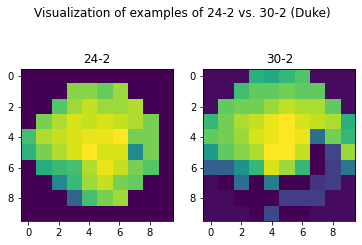

In [22]:
import matplotlib.pyplot as plt

# matplotlib.pyplot (plt)
#### subplots (plt.subplots)

figure, (ax1, ax2)= plt.subplots(1, 2)
figure.suptitle("Visualization of examples of 24-2 vs. 30-2 (Duke)")

ax1.imshow(X[0])
ax1.set_title("24-2")

ax2.imshow(X[95])
ax2.set_title("30-2")

# 4. Construct Y

In [23]:
label = pd.read_csv("gradings_agreement_raw.csv")
print("The shape of lable is:", label.shape)
label.head()

The shape of lable is: (500, 15)


,pdf_filename,reliability,normal,gdefect1,gposition1,gdefect2,gposition2,gdefect3,gposition3,ngdefect1,ngposition1,ngdefect2,ngposition2,artifact1,artifact2
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0


In [24]:
Y = label["normal"].to_numpy()

In [25]:
Y.shape

(500,)

In [26]:
from keras.utils import to_categorical

Y = to_categorical(Y)
Y.shape

(500, 2)

# 5. Train-test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2)

In [29]:
x_train.shape

(400, 10, 10, 1)

In [30]:
x_val.shape

(100, 10, 10, 1)

In [31]:
y_train.shape

(400, 2)

In [32]:
y_val.shape

(100, 2)

# 6. Test dataset -- UAB

In [33]:
df = pd.read_csv("15. Grader1_labels_VF (normal + S.I.D corrected).csv")

l = ['Threshold_1', 'Threshold_2', 'Threshold_3', 'Threshold_4',
       'Threshold_5', 'Threshold_6', 'Threshold_7', 'Threshold_8',
       'Threshold_9', 'Threshold_10', 'Threshold_11', 'Threshold_12',
       'Threshold_13', 'Threshold_14', 'Threshold_15', 'Threshold_16',
       'Threshold_17', 'Threshold_18', 'Threshold_19', 'Threshold_20',
       'Threshold_21', 'Threshold_22', 'Threshold_23', 'Threshold_24',
       'Threshold_25', 'Threshold_26', 'Threshold_27', 'Threshold_28',
       'Threshold_29', 'Threshold_30', 'Threshold_31', 'Threshold_32',
       'Threshold_33', 'Threshold_34', 'Threshold_35', 'Threshold_36',
       'Threshold_37', 'Threshold_38', 'Threshold_39', 'Threshold_40',
       'Threshold_41', 'Threshold_42', 'Threshold_43', 'Threshold_44',
       'Threshold_45', 'Threshold_46', 'Threshold_47', 'Threshold_48',
       'Threshold_49', 'Threshold_50', 'Threshold_51', 'Threshold_52',
       'Threshold_53', 'Threshold_54']

thr_UAB = df[l]

thr_UAB['2D'] = None

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
for i in range(thr_UAB.shape[0]):
    thr_UAB['2D'][i] = np.zeros((10, 10))
    
    # row 2
    thr_UAB['2D'][i][1, 3] = thr_UAB.iloc[i, 0]
    thr_UAB['2D'][i][1, 4] = thr_UAB.iloc[i, 1]
    thr_UAB['2D'][i][1, 5] = thr_UAB.iloc[i, 2]
    thr_UAB['2D'][i][1, 6] = thr_UAB.iloc[i, 3]
    
    # row 3
    thr_UAB['2D'][i][2, 2] = thr_UAB.iloc[i, 4]
    thr_UAB['2D'][i][2, 3] = thr_UAB.iloc[i, 5]
    thr_UAB['2D'][i][2, 4] = thr_UAB.iloc[i, 6]
    thr_UAB['2D'][i][2, 5] = thr_UAB.iloc[i, 7]
    thr_UAB['2D'][i][2, 6] = thr_UAB.iloc[i, 8]
    thr_UAB['2D'][i][2, 7] = thr_UAB.iloc[i, 9]
    
    # row 4
    thr_UAB['2D'][i][3, 1] = thr_UAB.iloc[i, 10]
    thr_UAB['2D'][i][3, 2] = thr_UAB.iloc[i, 11]
    thr_UAB['2D'][i][3, 3] = thr_UAB.iloc[i, 12]
    thr_UAB['2D'][i][3, 4] = thr_UAB.iloc[i, 13]
    thr_UAB['2D'][i][3, 5] = thr_UAB.iloc[i, 14]
    thr_UAB['2D'][i][3, 6] = thr_UAB.iloc[i, 15]
    thr_UAB['2D'][i][3, 7] = thr_UAB.iloc[i, 16]
    thr_UAB['2D'][i][3, 8] = thr_UAB.iloc[i, 17]
    
    # row 5
    thr_UAB['2D'][i][4, 0] = thr_UAB.iloc[i, 18]
    thr_UAB['2D'][i][4, 1] = thr_UAB.iloc[i, 19]
    thr_UAB['2D'][i][4, 2] = thr_UAB.iloc[i, 20]
    thr_UAB['2D'][i][4, 3] = thr_UAB.iloc[i, 21]
    thr_UAB['2D'][i][4, 4] = thr_UAB.iloc[i, 22]
    thr_UAB['2D'][i][4, 5] = thr_UAB.iloc[i, 23]
    thr_UAB['2D'][i][4, 6] = thr_UAB.iloc[i, 24]
    thr_UAB['2D'][i][4, 7] = thr_UAB.iloc[i, 25]
    thr_UAB['2D'][i][4, 8] = thr_UAB.iloc[i, 26]
    
    # row 6
    thr_UAB['2D'][i][5, 0] = thr_UAB.iloc[i, 27]
    thr_UAB['2D'][i][5, 1] = thr_UAB.iloc[i, 28]
    thr_UAB['2D'][i][5, 2] = thr_UAB.iloc[i, 29]
    thr_UAB['2D'][i][5, 3] = thr_UAB.iloc[i, 30]
    thr_UAB['2D'][i][5, 4] = thr_UAB.iloc[i, 31] 
    thr_UAB['2D'][i][5, 5] = thr_UAB.iloc[i, 32]
    thr_UAB['2D'][i][5, 6] = thr_UAB.iloc[i, 33]
    thr_UAB['2D'][i][5, 7] = thr_UAB.iloc[i, 34]
    thr_UAB['2D'][i][5, 8] = thr_UAB.iloc[i, 35]
    
    # row 7
    thr_UAB['2D'][i][6, 1] = thr_UAB.iloc[i, 36]
    thr_UAB['2D'][i][6, 2] = thr_UAB.iloc[i, 37]
    thr_UAB['2D'][i][6, 3] = thr_UAB.iloc[i, 38]
    thr_UAB['2D'][i][6, 4] = thr_UAB.iloc[i, 39]
    thr_UAB['2D'][i][6, 5] = thr_UAB.iloc[i, 40]
    thr_UAB['2D'][i][6, 6] = thr_UAB.iloc[i, 41]
    thr_UAB['2D'][i][6, 7] = thr_UAB.iloc[i, 42]
    thr_UAB['2D'][i][6, 8] = thr_UAB.iloc[i, 43]
    
    # row 8
    thr_UAB['2D'][i][7, 2] = thr_UAB.iloc[i, 44]
    thr_UAB['2D'][i][7, 3] = thr_UAB.iloc[i, 45]
    thr_UAB['2D'][i][7, 4] = thr_UAB.iloc[i, 46]
    thr_UAB['2D'][i][7, 5] = thr_UAB.iloc[i, 47]
    thr_UAB['2D'][i][7, 6] = thr_UAB.iloc[i, 48]
    thr_UAB['2D'][i][7, 7] = thr_UAB.iloc[i, 49]
    
    # row 9
    thr_UAB['2D'][i][8, 3] = thr_UAB.iloc[i, 50]
    thr_UAB['2D'][i][8, 4] = thr_UAB.iloc[i, 51]
    thr_UAB['2D'][i][8, 5] = thr_UAB.iloc[i, 52]
    thr_UAB['2D'][i][8, 6] = thr_UAB.iloc[i, 53]

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
X_UAB = thr_UAB['2D']
X_UAB.shape

(301,)

### Important step

In [36]:
list_UAB = []
for i in range(thr_UAB.shape[0]):
    list_UAB.append(thr_UAB['2D'][i])

print("The length of list is", len(list_UAB))
list_UAB[1].shape

The length of list is 301


(10, 10)

In [37]:
X_UAB = np.array(list_UAB)
print(X_UAB.shape)
X_UAB = X_UAB.reshape(301, 10, 10, 1).astype('float32')
print(X_UAB.shape)

(301, 10, 10)
(301, 10, 10, 1)


### Visualization

Text(0.5, 1.0, '2nd')

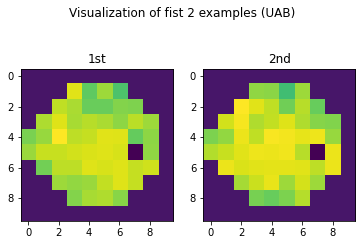

In [38]:
import matplotlib.pyplot as plt
# matplotlib.pyplot (plt)
#### subplots (plt.subplots)

figure, (ax1, ax2)= plt.subplots(1, 2)
figure.suptitle("Visualization of fist 2 examples (UAB)")

ax1.imshow(X_UAB[0])
ax1.set_title("1st")

ax2.imshow(X_UAB[1])
ax2.set_title("2nd")

In [39]:
Y_UAB = df["normal"].to_numpy()
from keras.utils import to_categorical
Y_UAB = to_categorical(Y_UAB)

num_classes = Y_UAB.shape[1] # number of categories
num_classes

2

In [40]:
Y_UAB.shape

(301, 2)

# 7. Fit the Shallow NN (SNN)
on 400 Duke data

# 8. Validation
on 100 Duke data

# 9. Test
on 301 UAB data

### 1. Convolutional Layer with One set of convolutional and pooling layers

Let's start by importing the keras libraries and the packages that we would need to build a neural network.

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

When working with convolutional neural networks in particular, we will need additional packages.

In [43]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.

In [41]:
### original
def convolutional_model_1():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (2, 2), strides=(1, 1), activation='relu', 
                     input_shape=(10, 10, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, activation='softmax')) 
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', 
                  metrics=['MeanSquaredError', 'accuracy', 'AUC'])
    return model

Finally, let's call the function to create the model, and then let's train it and evaluate it.

In [51]:
# build the model
model1 = convolutional_model_1()
epochs = 15
# fit the model
history = model1.fit(x_train, y_train, validation_data=(x_val, y_val), 
          epochs=epochs, batch_size=30, verbose=0)

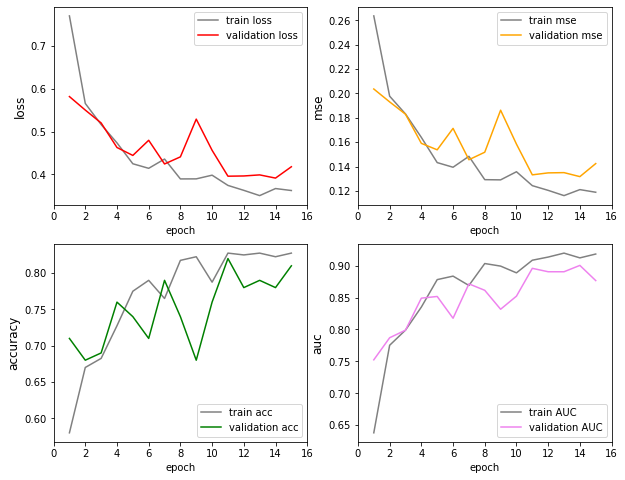

In [52]:
plt.figure(figsize=(10, 8))
start_epoch = 1

# 1. plot the Train/val curve for loss #for the first iteration
plt.subplot(221)
#plt.title('Train/val LOSS')
plt.plot(np.arange(start_epoch,epochs+1), history.history['loss'][start_epoch-1:],label='train loss', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history.history['val_loss'][start_epoch-1:],label='validation loss', color = 'red')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('loss', size = 12)
plt.legend()

# 2. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(222)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history.history['mean_squared_error'][start_epoch-1:],label='train mse', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history.history['val_mean_squared_error'][start_epoch-1:],label='validation mse', color = 'orange')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('mse', size = 12)
plt.legend()

# 3. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(223)
#plt.title('Train/val ACCURACY')
plt.plot(np.arange(start_epoch,epochs+1), history.history['accuracy'][start_epoch-1:],label='train acc', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history.history['val_accuracy'][start_epoch-1:],label='validation acc', color = 'green')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('accuracy', size = 12)
plt.legend()

# 4. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(224)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history.history['auc'][start_epoch-1:],label='train AUC', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history.history['val_auc'][start_epoch-1:],label='validation AUC', color = 'violet')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('auc', size = 12)
plt.legend()

plt.show()


In [53]:
# evaluate the model
val_scores = model1.evaluate(x_val, y_val, verbose=0)
print(" loss: {} \n mse: {} \n accuracy: {} \n auc {}"
      .format(val_scores[0], val_scores[1], 
              val_scores[2], val_scores[3]))

 loss: 0.41779956221580505 
 mse: 0.14243948459625244 
 accuracy: 0.8100000023841858 
 auc 0.8766499757766724


In [54]:
# test the model
test_scores = model1.evaluate(X_UAB, Y_UAB, verbose=0)
print(" loss: {} \n mse: {} \n accuracy: {} \n auc {}"
      .format(test_scores[0], test_scores[1], 
              test_scores[2], test_scores[3]))

 loss: 0.5822128653526306 
 mse: 0.21214154362678528 
 accuracy: 0.6378737688064575 
 auc 0.7563713788986206


In [55]:
df_val = pd.DataFrame(index=['loss','mse', 'accuracy', 'auc'])
df_val['validation (M1)'] = val_scores

df_test = pd.DataFrame(index=['loss','mse', 'accuracy', 'auc'])
df_test['test (M1)'] = test_scores

model_1 = pd.concat([df_val, df_test], axis = 1)
model_1

,validation (M1),test (M1)
loss,0.417800,0.582213
mse,0.142439,0.212142
accuracy,0.810000,0.637874
auc,0.876650,0.756371


### 2. Convolutional Layer with two sets of convolutional vs pooling layers

Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.

In [63]:
### original

def convolutional_model_2():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (2, 2), strides=(1, 1), activation='relu', 
                     input_shape=(10, 10, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['MeanSquaredError', 'accuracy', 'AUC'])
    return model

In [84]:
# build the model
model2 = convolutional_model_2()
epochs = 15
# fit the model
history = model2.fit(x_train, y_train, validation_data=(x_val, y_val), 
          epochs=epochs, batch_size=30, verbose=0)

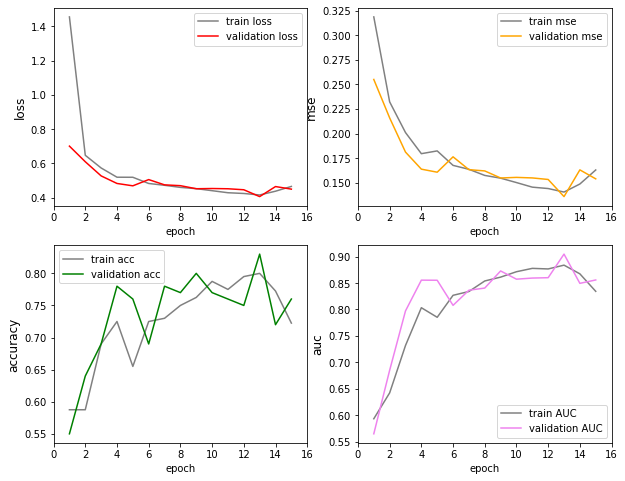

In [85]:
plt.figure(figsize=(10, 8))
start_epoch = 1

# 1. plot the Train/val curve for loss #for the first iteration
plt.subplot(221)
#plt.title('Train/val LOSS')
plt.plot(np.arange(start_epoch,epochs+1), history.history['loss'][start_epoch-1:],label='train loss', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history.history['val_loss'][start_epoch-1:],label='validation loss', color = 'red')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('loss', size = 12)
plt.legend()

# 2. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(222)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history.history['mean_squared_error'][start_epoch-1:],label='train mse', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history.history['val_mean_squared_error'][start_epoch-1:],label='validation mse', color = 'orange')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('mse', size = 12)
plt.legend()

# 3. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(223)
#plt.title('Train/val ACCURACY')
plt.plot(np.arange(start_epoch,epochs+1), history.history['accuracy'][start_epoch-1:],label='train acc', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history.history['val_accuracy'][start_epoch-1:],label='validation acc', color = 'green')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('accuracy', size = 12)
plt.legend()

# 4. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(224)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history.history['auc'][start_epoch-1:],label='train AUC', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history.history['val_auc'][start_epoch-1:],label='validation AUC', color = 'violet')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('auc', size = 12)
plt.legend()

plt.show()



In [86]:
# evaluate the model
val_scores = model2.evaluate(x_val, y_val, verbose=0)
print(" loss: {} \n mse: {} \n accuracy: {} \n auc {}"
      .format(val_scores[0], val_scores[1], 
              val_scores[2], val_scores[3]))

 loss: 0.4504552185535431 
 mse: 0.15387363731861115 
 accuracy: 0.7599999904632568 
 auc 0.8557999730110168


In [87]:
# test the model
test_scores = model2.evaluate(X_UAB, Y_UAB, verbose=0)
print(" loss: {} \n mse: {} \n accuracy: {} \n auc {}"
      .format(test_scores[0], test_scores[1], 
              test_scores[2], test_scores[3]))

 loss: 0.5638723969459534 
 mse: 0.20123794674873352 
 accuracy: 0.6578072905540466 
 auc 0.7423759698867798


In [88]:
df_val = pd.DataFrame(index=['loss','mse', 'accuracy', 'auc'])
df_val['validation (M2)'] = val_scores

df_test = pd.DataFrame(index=['loss','mse', 'accuracy', 'auc'])
df_test['test (M2)'] = test_scores

model_2 = pd.concat([df_val, df_test], axis = 1)
model_2

,validation (M2),test (M2)
loss,0.450455,0.563872
mse,0.153874,0.201238
accuracy,0.760000,0.657807
auc,0.855800,0.742376


In [89]:
df = pd.concat([model_1, model_2], axis = 1)
df

,validation (M1),test (M1),validation (M2),test (M2)
loss,0.417800,0.582213,0.450455,0.563872
mse,0.142439,0.212142,0.153874,0.201238
accuracy,0.810000,0.637874,0.760000,0.657807
auc,0.876650,0.756371,0.855800,0.742376


# 10. Save the model

In [90]:
model1.save("SNN_1.h5")
model2.save("SNN_2.h5")

In [91]:
from keras.models import load_model
pretrained_model1 = load_model('SNN_1.h5')
pretrained_model2 = load_model('SNN_2.h5')